In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
bank_data = pd.read_csv('/kaggle/input/predicting-churn-for-bank-customers/Churn_Modelling.csv')

In [6]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:


bank_data.shape

(10000, 14)

### Checking null value

In [8]:
bank_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Exploratory data analysis

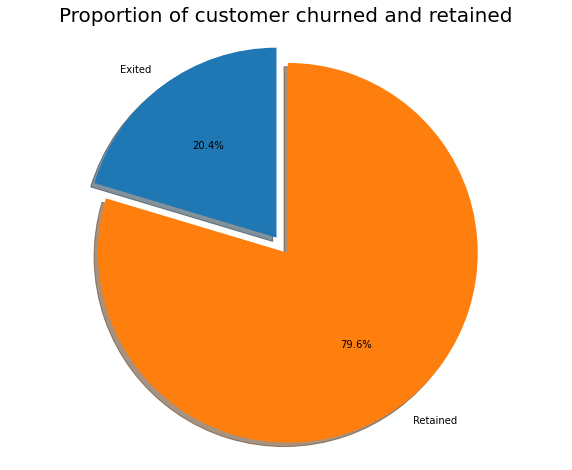

In [9]:
labels = 'Exited', 'Retained'
sizes = [bank_data.Exited[bank_data['Exited']==1].count(), bank_data.Exited[bank_data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

### Conclusion : - 20 Percent customer has churned only. Machine learning model accuracy must be 80 percent so that it is useful for the bank.

In [10]:
Bank_data_geography_wise = bank_data.groupby('Geography')['Exited'].value_counts().unstack().add_prefix('').rename_axis(None, axis =1).reset_index()

In [11]:
Bank_data_geography_wise.head()

,Geography,0,1
0,France,4204,810
1,Germany,1695,814
2,Spain,2064,413


In [12]:
Bank_data_geography_wise.columns =['Geography', 'Not_Exited', 'Exited']

In [13]:
Bank_data_geography_wise.head()

,Geography,Not_Exited,Exited
0,France,4204,810
1,Germany,1695,814
2,Spain,2064,413


In [14]:
Bank_data_geography_wise["Total"] = Bank_data_geography_wise["Not_Exited"] + Bank_data_geography_wise["Exited"]

In [15]:
Bank_data_geography_wise["Percentage_Exited"] = (Bank_data_geography_wise["Exited"] / Bank_data_geography_wise["Total"]) * 100

In [16]:
Bank_data_geography_wise["Percentage_Not_Exited"] = (Bank_data_geography_wise["Not_Exited"] / Bank_data_geography_wise["Total"]) * 100

In [17]:
Bank_data_geography_wise.head()

,Geography,Not_Exited,Exited,Total,Percentage_Exited,Percentage_Not_Exited
0,France,4204,810,5014,16.154767,83.845233
1,Germany,1695,814,2509,32.443204,67.556796
2,Spain,2064,413,2477,16.673395,83.326605


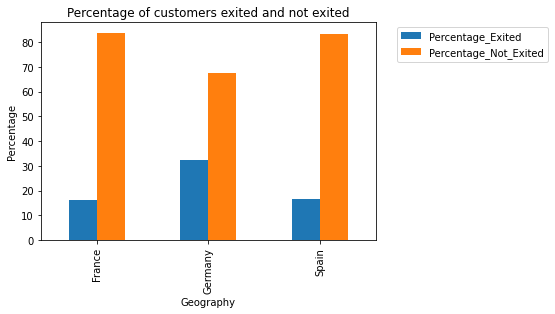

In [18]:
Bank_data_geography_wise.plot(x="Geography", y=["Percentage_Exited", "Percentage_Not_Exited"], kind="bar")
plt.xlabel('Geography')
plt.ylabel('Percentage')
plt.title('Percentage of customers exited and not exited')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### Conclusion : - In geograpghy Germany more customers exited compared to spain and france

In [19]:
bank_data_gender_wise = bank_data.groupby('Gender')['Exited'].value_counts().unstack().add_prefix('').rename_axis(None, axis =1).reset_index()

In [20]:
bank_data_gender_wise.head()

,Gender,0,1
0,Female,3404,1139
1,Male,4559,898


In [21]:
bank_data_gender_wise.columns = ['Gender','Not_Exited','Exited']

In [22]:
bank_data_gender_wise["Total"] = bank_data_gender_wise['Not_Exited'] + bank_data_gender_wise['Exited']

In [23]:
bank_data_gender_wise.head()

,Gender,Not_Exited,Exited,Total
0,Female,3404,1139,4543
1,Male,4559,898,5457


In [24]:
bank_data_gender_wise["Percentage_Exited"] = (bank_data_gender_wise["Exited"] / bank_data_gender_wise["Total"]) * 100

In [25]:
bank_data_gender_wise["Percentage_Not_Exited"] = (bank_data_gender_wise["Not_Exited"] / bank_data_gender_wise["Total"]) * 100

In [26]:
bank_data_gender_wise.head()

,Gender,Not_Exited,Exited,Total,Percentage_Exited,Percentage_Not_Exited
0,Female,3404,1139,4543,25.071539,74.928461
1,Male,4559,898,5457,16.455928,83.544072


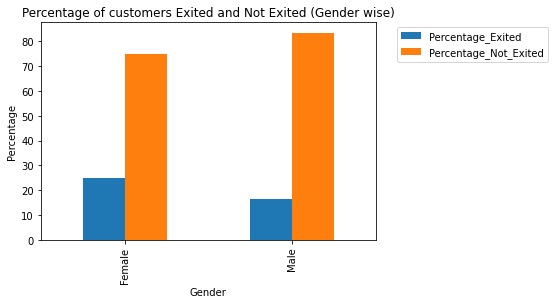

In [27]:
bank_data_gender_wise.plot(x = "Gender", y = ["Percentage_Exited", "Percentage_Not_Exited"], kind = "bar")
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of customers Exited and Not Exited (Gender wise)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### Conclusion : - More female exited than men

In [28]:
print("Min Age in dataset", min(bank_data["Age"].unique()))
print("Max Tenure in dataset", max(bank_data["Age"].unique()))

Min Age in dataset 18
Max Tenure in dataset 92


In [29]:
bank_data["Age_Group"] = pd.cut(x=bank_data['Age'], bins = [0, 20 , 35, 50, 100], 
                                labels = ["Teenager","Younger","Elder","Older"])

In [30]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Elder
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Elder
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Elder
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Elder
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Elder


In [31]:
bank_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Elder
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Younger
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Elder
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Elder
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,Younger


In [32]:
bank_data_age_group_wise = bank_data.groupby('Age_Group')['Exited'].value_counts().unstack().add_prefix('').rename_axis(None , axis = 1).reset_index()

In [33]:
bank_data_age_group_wise.head()

,Age_Group,0,1
0,Teenager,84,5
1,Younger,3722,342
2,Elder,3459,1127
3,Older,698,563


In [34]:
bank_data_age_group_wise.columns = ["Age_Group","Not_Exited","Exited"]

In [35]:
bank_data_age_group_wise.head()

,Age_Group,Not_Exited,Exited
0,Teenager,84,5
1,Younger,3722,342
2,Elder,3459,1127
3,Older,698,563


In [36]:
bank_data_age_group_wise["Total"] = bank_data_age_group_wise["Not_Exited"] + bank_data_age_group_wise["Exited"]

In [37]:
bank_data_age_group_wise["Percentage_Exited"] = (bank_data_age_group_wise["Exited"] / bank_data_age_group_wise["Total"]) * 100

In [38]:
bank_data_age_group_wise["Percentage_Not_Exited"] = (bank_data_age_group_wise["Not_Exited"] / bank_data_age_group_wise["Total"]) * 100

In [39]:
bank_data_age_group_wise.head()

,Age_Group,Not_Exited,Exited,Total,Percentage_Exited,Percentage_Not_Exited
0,Teenager,84,5,89,5.617978,94.382022
1,Younger,3722,342,4064,8.415354,91.584646
2,Elder,3459,1127,4586,24.574793,75.425207
3,Older,698,563,1261,44.647105,55.352895


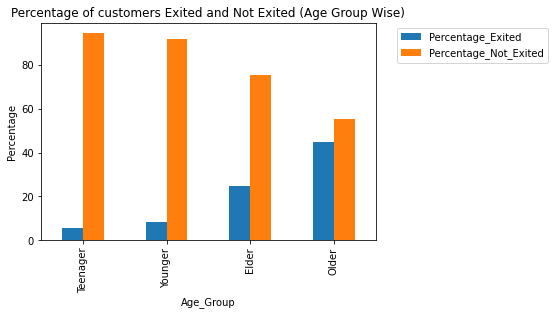

In [40]:
bank_data_age_group_wise.plot(x = "Age_Group", y = ["Percentage_Exited", "Percentage_Not_Exited"], kind = "bar")
plt.xlabel('Age_Group')
plt.ylabel('Percentage')
plt.title('Percentage of customers Exited and Not Exited (Age Group Wise)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

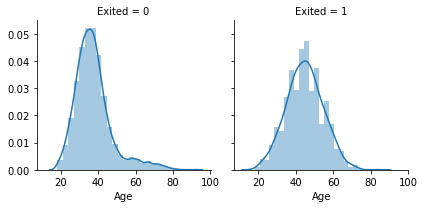

In [41]:
g = sns.FacetGrid(bank_data, col = "Exited")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

### Younger customer stick with the company compare to older

### Conclusion : - Most of the customer exited are from older age group (50 to 70 years)

Text(0, 0.5, 'Customer _Exited (1 = True, 0 = False) ')

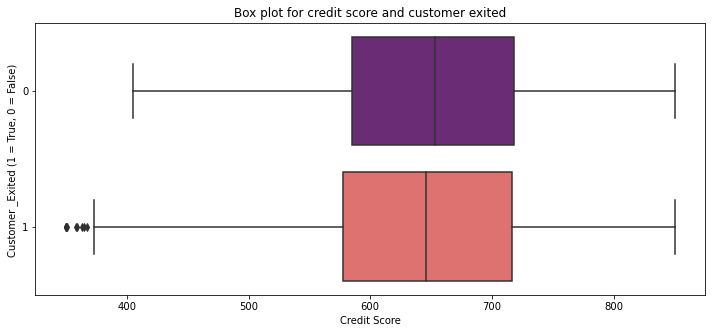

In [42]:
plt.figure(figsize=(12,5))
plt.title("Box plot for credit score and customer exited")
sns.boxplot(y="Exited", x="CreditScore", data = bank_data, orient="h", palette = 'magma')
plt.xlabel('Credit Score')
plt.ylabel('Customer _Exited (1 = True, 0 = False) ')

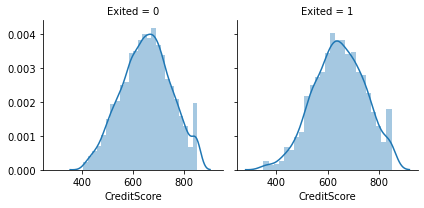

In [43]:
g = sns.FacetGrid(bank_data, col = "Exited")
g.map(sns.distplot, "CreditScore", bins = 25)
plt.show()

### It seems that there is no relation between creditscore and customer exited

Text(0, 0.5, 'Customer _Exited (1 = True, 0 = False) ')

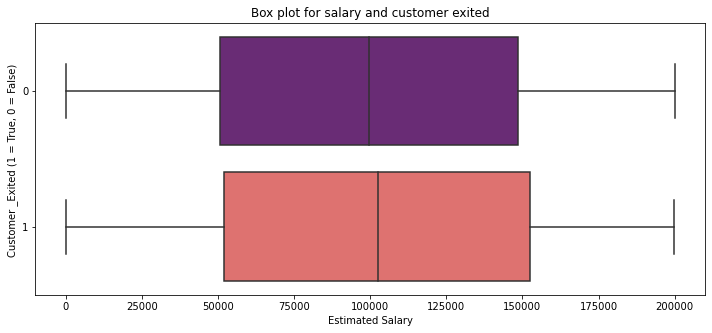

In [44]:
plt.figure(figsize=(12,5))
plt.title("Box plot for salary and customer exited")
sns.boxplot(y="Exited", x="EstimatedSalary", data = bank_data, orient="h", palette = 'magma')
plt.xlabel('Estimated Salary')
plt.ylabel('Customer _Exited (1 = True, 0 = False) ')

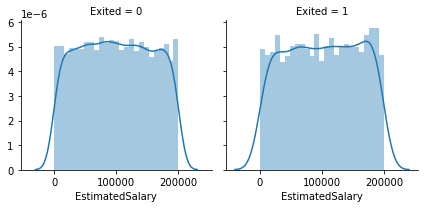

In [45]:
g = sns.FacetGrid(bank_data, col = "Exited")
g.map(sns.distplot, "EstimatedSalary", bins = 25)
plt.show()

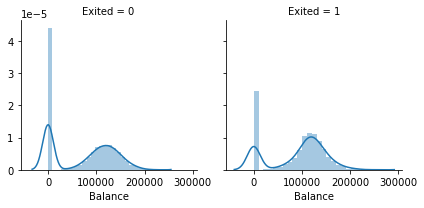

In [46]:
g = sns.FacetGrid(bank_data, col = "Exited")
g.map(sns.distplot, "Balance", bins = 25)
plt.show()

In [47]:
Bank_data_No_of_products = bank_data.groupby('NumOfProducts')['Exited'].value_counts().unstack().add_prefix('').rename_axis(None, axis =1).reset_index()

In [48]:
Bank_data_No_of_products.head()

,NumOfProducts,0,1
0,1,3675.0,1409.0
1,2,4242.0,348.0
2,3,46.0,220.0
3,4,NaN,60.0


In [49]:
Bank_data_No_of_products.columns = ['Product_count','Not_Exited','Exited']

In [50]:
Bank_data_No_of_products.head(10)

,Product_count,Not_Exited,Exited
0,1,3675.0,1409.0
1,2,4242.0,348.0
2,3,46.0,220.0
3,4,NaN,60.0


In [51]:
Bank_data_No_of_products["Not_Exited"] = Bank_data_No_of_products["Not_Exited"].fillna(0)

In [52]:

Bank_data_No_of_products.head()

,Product_count,Not_Exited,Exited
0,1,3675.0,1409.0
1,2,4242.0,348.0
2,3,46.0,220.0
3,4,0.0,60.0


In [53]:
Bank_data_No_of_products["Total"] = Bank_data_No_of_products["Not_Exited"] + Bank_data_No_of_products["Exited"]
Bank_data_No_of_products["Percentage_Exited"] = (Bank_data_No_of_products["Exited"] / Bank_data_No_of_products["Total"]) * 100
Bank_data_No_of_products["Percentage_Not_Exited"] = (Bank_data_No_of_products["Not_Exited"] / Bank_data_No_of_products["Total"]) *100

In [54]:
Bank_data_No_of_products.head()

,Product_count,Not_Exited,Exited,Total,Percentage_Exited,Percentage_Not_Exited
0,1,3675.0,1409.0,5084.0,27.714398,72.285602
1,2,4242.0,348.0,4590.0,7.581699,92.418301
2,3,46.0,220.0,266.0,82.706767,17.293233
3,4,0.0,60.0,60.0,100.000000,0.000000


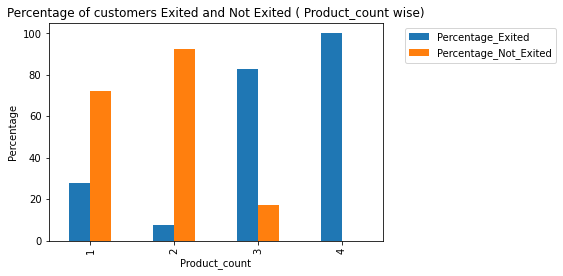

In [55]:
Bank_data_No_of_products.plot(x = "Product_count", y = ["Percentage_Exited", "Percentage_Not_Exited"], kind = "bar")
plt.xlabel('Product_count')
plt.ylabel('Percentage')
plt.title('Percentage of customers Exited and Not Exited ( Product_count wise)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### Customers having product count 3 & 4 have more churn rate

### It seems that there is no so-relation between balance and estimated salary

In [56]:
Bank_data_Tenure = bank_data.groupby('Tenure')['Exited'].value_counts().unstack().add_prefix('').rename_axis(None, axis =1).reset_index()

In [57]:
Bank_data_Tenure.head(10)

,Tenure,0,1
0,0,318,95
1,1,803,232
2,2,847,201
3,3,796,213
4,4,786,203
5,5,803,209
6,6,771,196
7,7,851,177
8,8,828,197
9,9,771,213


In [58]:
Bank_data_Tenure.columns = ['Tenure','Not_Exited','Exited']
Bank_data_Tenure.head(10)

,Tenure,Not_Exited,Exited
0,0,318,95
1,1,803,232
2,2,847,201
3,3,796,213
4,4,786,203
5,5,803,209
6,6,771,196
7,7,851,177
8,8,828,197
9,9,771,213


In [59]:
Bank_data_Tenure["Total"] = Bank_data_Tenure["Not_Exited"] + Bank_data_Tenure["Exited"]
Bank_data_Tenure["Percentage_Exited"] = (Bank_data_Tenure["Exited"] / Bank_data_Tenure["Total"]) * 100
Bank_data_Tenure["Percentage_Not_Exited"] = (Bank_data_Tenure["Not_Exited"] / Bank_data_Tenure["Total"]) *100
Bank_data_Tenure.head(10)

,Tenure,Not_Exited,Exited,Total,Percentage_Exited,Percentage_Not_Exited
0,0,318,95,413,23.002421,76.997579
1,1,803,232,1035,22.415459,77.584541
2,2,847,201,1048,19.179389,80.820611
3,3,796,213,1009,21.110010,78.889990
4,4,786,203,989,20.525784,79.474216
5,5,803,209,1012,20.652174,79.347826
6,6,771,196,967,20.268873,79.731127
7,7,851,177,1028,17.217899,82.782101
8,8,828,197,1025,19.219512,80.780488
9,9,771,213,984,21.646341,78.353659


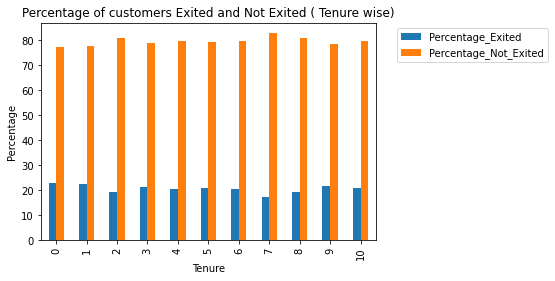

In [60]:
Bank_data_Tenure.plot(x = "Tenure", y = ["Percentage_Exited", "Percentage_Not_Exited"], kind = "bar")
plt.xlabel('Tenure')
plt.ylabel('Percentage')
plt.title('Percentage of customers Exited and Not Exited ( Tenure wise)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### No any relation found between tenure and percentage of customer exited

In [61]:
Bank_data_IsActiveMember = bank_data.groupby('IsActiveMember')['Exited'].value_counts().unstack().add_prefix('').rename_axis(None, axis =1).reset_index()

In [62]:
Bank_data_IsActiveMember.columns = ['IsActiveMember','Not_Exited','Exited']
Bank_data_IsActiveMember.head(10)

,IsActiveMember,Not_Exited,Exited
0,0,3547,1302
1,1,4416,735


In [63]:
Bank_data_IsActiveMember["Total"] = Bank_data_IsActiveMember["Not_Exited"] + Bank_data_IsActiveMember["Exited"]
Bank_data_IsActiveMember["Percentage_Exited"] = (Bank_data_IsActiveMember["Exited"] / Bank_data_IsActiveMember["Total"]) * 100
Bank_data_IsActiveMember["Percentage_Not_Exited"] = (Bank_data_IsActiveMember["Not_Exited"] / Bank_data_IsActiveMember["Total"]) *100
Bank_data_IsActiveMember.head(10)

,IsActiveMember,Not_Exited,Exited,Total,Percentage_Exited,Percentage_Not_Exited
0,0,3547,1302,4849,26.850897,73.149103
1,1,4416,735,5151,14.269074,85.730926


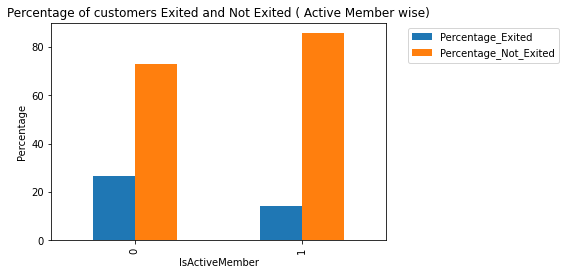

In [64]:
Bank_data_IsActiveMember.plot(x = "IsActiveMember", y = ["Percentage_Exited", "Percentage_Not_Exited"], kind = "bar")
plt.xlabel('IsActiveMember')
plt.ylabel('Percentage')
plt.title('Percentage of customers Exited and Not Exited ( Active Member wise)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [65]:
Bank_data_HasCrCard = bank_data.groupby('HasCrCard')['Exited'].value_counts().unstack().add_prefix('').rename_axis(None, axis =1).reset_index()

In [66]:
Bank_data_HasCrCard.columns = ['HasCrCard','Not_Exited','Exited']
Bank_data_HasCrCard.head(10)

,HasCrCard,Not_Exited,Exited
0,0,2332,613
1,1,5631,1424


In [67]:
Bank_data_HasCrCard["Total"] = Bank_data_HasCrCard["Not_Exited"] + Bank_data_HasCrCard["Exited"]
Bank_data_HasCrCard["Percentage_Exited"] = (Bank_data_HasCrCard["Exited"] / Bank_data_HasCrCard["Total"]) * 100
Bank_data_HasCrCard["Percentage_Not_Exited"] = (Bank_data_HasCrCard["Not_Exited"] / Bank_data_HasCrCard["Total"]) *100
Bank_data_HasCrCard.head(10)

,HasCrCard,Not_Exited,Exited,Total,Percentage_Exited,Percentage_Not_Exited
0,0,2332,613,2945,20.814941,79.185059
1,1,5631,1424,7055,20.184266,79.815734


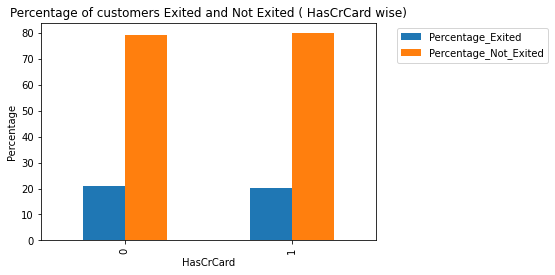

In [68]:
Bank_data_HasCrCard.plot(x = "HasCrCard", y = ["Percentage_Exited", "Percentage_Not_Exited"], kind = "bar")
plt.xlabel('HasCrCard')
plt.ylabel('Percentage')
plt.title('Percentage of customers Exited and Not Exited ( HasCrCard wise)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [69]:
print("Min Balance in dataset", min(bank_data["Balance"].unique()))
print("Max Balance in dataset", max(bank_data["Balance"].unique()))

Min Balance in dataset 0.0
Max Balance in dataset 250898.09


In [70]:
bank_data["Balance_1"] = pd.cut(x=bank_data['Balance'], bins = [-1, 10000, 100000, 200000,300000 ], 
                                labels = ["Low balance","Medium balance","High balance","Highest balance"])

In [71]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,Balance_1
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Elder,Low balance
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Elder,Medium balance
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Elder,High balance
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Elder,Low balance
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Elder,High balance


In [72]:
bank_data_balance = bank_data.groupby('Balance_1')['Exited'].value_counts().unstack().add_prefix('').rename_axis(None , axis = 1).reset_index()

In [73]:
bank_data_balance.columns = ['Balance_1','Not_Exited','Exited']
bank_data_balance.head(10)

,Balance_1,Not_Exited,Exited
0,Low balance,3117,501
1,Medium balance,1258,325
2,High balance,3573,1192
3,Highest balance,15,19


In [74]:
bank_data_balance["Not_Exited"] = bank_data_balance["Not_Exited"].fillna(0)

In [75]:
bank_data_balance["Total"] = bank_data_balance["Not_Exited"] + bank_data_balance["Exited"]
bank_data_balance["Percentage_Exited"] = (bank_data_balance["Exited"] / bank_data_balance["Total"]) * 100
bank_data_balance["Percentage_Not_Exited"] = (bank_data_balance["Not_Exited"] / bank_data_balance["Total"]) *100
bank_data_balance.head(10)

,Balance_1,Not_Exited,Exited,Total,Percentage_Exited,Percentage_Not_Exited
0,Low balance,3117,501,3618,13.847430,86.152570
1,Medium balance,1258,325,1583,20.530638,79.469362
2,High balance,3573,1192,4765,25.015740,74.984260
3,Highest balance,15,19,34,55.882353,44.117647


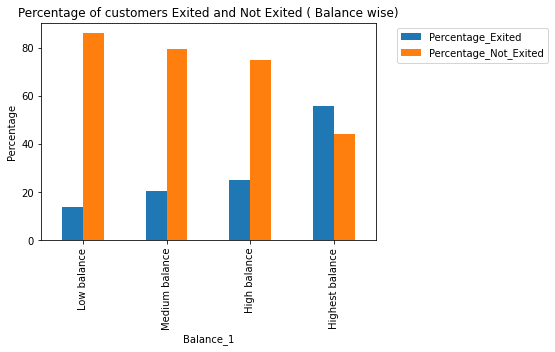

In [76]:
bank_data_balance.plot(x = "Balance_1", y = ["Percentage_Exited", "Percentage_Not_Exited"], kind = "bar")
plt.xlabel('Balance_1')
plt.ylabel('Percentage')
plt.title('Percentage of customers Exited and Not Exited ( Balance wise)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### From above plot it can be seen that as the balance increases churn percentage increases

In [77]:
print("Min CreditScore", min(bank_data["CreditScore"].unique()))
print("Max CreditScore", max(bank_data["CreditScore"].unique()))

Min CreditScore 350
Max CreditScore 850


In [78]:
bank_data["CreditScore_1"] = pd.cut(x=bank_data['CreditScore'], bins = [249, 500, 650, 851 ], 
                                labels = ["Low score","Medium score","High score"])

In [79]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,Balance_1,CreditScore_1
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Elder,Low balance,Medium score
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Elder,Medium balance,Medium score
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Elder,High balance,Medium score
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Elder,Low balance,High score
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Elder,High balance,High score


In [80]:
bank_data_creditscore = bank_data.groupby('CreditScore_1')['Exited'].value_counts().unstack().add_prefix('').rename_axis(None , axis = 1).reset_index()

In [81]:
bank_data_creditscore.columns = ['CreditScore_1','Not_Exited','Exited']
bank_data_creditscore.head(10)

,CreditScore_1,Not_Exited,Exited
0,Low score,491,152
1,Medium score,3389,905
2,High score,4083,980


In [82]:
bank_data_creditscore["Total"] = bank_data_creditscore["Not_Exited"] + bank_data_creditscore["Exited"]
bank_data_creditscore["Percentage_Exited"] = (bank_data_creditscore["Exited"] / bank_data_creditscore["Total"]) * 100
bank_data_creditscore["Percentage_Not_Exited"] = (bank_data_creditscore["Not_Exited"] / bank_data_creditscore["Total"]) *100
bank_data_creditscore.head(10)

,CreditScore_1,Not_Exited,Exited,Total,Percentage_Exited,Percentage_Not_Exited
0,Low score,491,152,643,23.639191,76.360809
1,Medium score,3389,905,4294,21.075920,78.924080
2,High score,4083,980,5063,19.356113,80.643887


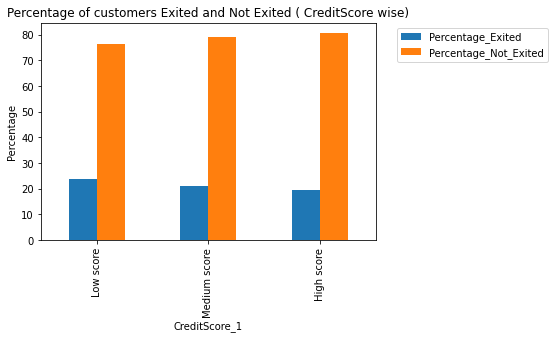

In [83]:
bank_data_creditscore.plot(x = "CreditScore_1", y = ["Percentage_Exited", "Percentage_Not_Exited"], kind = "bar")
plt.xlabel('CreditScore_1')
plt.ylabel('Percentage')
plt.title('Percentage of customers Exited and Not Exited ( CreditScore wise)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [84]:
print("Min Estimated Salary in dataset", min(bank_data["EstimatedSalary"].unique()))
print("Max Estimated Salary in dataset", max(bank_data["EstimatedSalary"].unique()))

Min Estimated Salary in dataset 11.58
Max Estimated Salary in dataset 199992.48


In [85]:
bank_data["EstimatedSalary_1"] = pd.cut(x=bank_data['EstimatedSalary'], bins = [10, 1000, 10000, 50000, 100000, 200000 ], 
                                labels = ["Extremly_low","Low","Average","Above Average","High"])

In [86]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,Balance_1,CreditScore_1,EstimatedSalary_1
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Elder,Low balance,Medium score,High
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Elder,Medium balance,Medium score,High
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Elder,High balance,Medium score,High
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Elder,Low balance,High score,Above Average
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Elder,High balance,High score,Above Average


In [87]:
bank_data_EstimatedSalary = bank_data.groupby('EstimatedSalary_1')['Exited'].value_counts().unstack().add_prefix('').rename_axis(None , axis = 1).reset_index()

In [88]:
bank_data_EstimatedSalary.columns = ['EstimatedSalary_1','Not_Exited','Exited']
bank_data_creditscore.head(10)

,CreditScore_1,Not_Exited,Exited,Total,Percentage_Exited,Percentage_Not_Exited
0,Low score,491,152,643,23.639191,76.360809
1,Medium score,3389,905,4294,21.075920,78.924080
2,High score,4083,980,5063,19.356113,80.643887


In [89]:
bank_data_EstimatedSalary["Total"] = bank_data_EstimatedSalary["Not_Exited"] + bank_data_EstimatedSalary["Exited"]
bank_data_EstimatedSalary["Percentage_Exited"] = (bank_data_EstimatedSalary["Exited"] / bank_data_EstimatedSalary["Total"]) * 100
bank_data_EstimatedSalary["Percentage_Not_Exited"] = (bank_data_EstimatedSalary["Not_Exited"] / bank_data_EstimatedSalary["Total"]) *100
bank_data_EstimatedSalary.head(10)

,EstimatedSalary_1,Not_Exited,Exited,Total,Percentage_Exited,Percentage_Not_Exited
0,Extremly_low,46,13,59,22.033898,77.966102
1,Low,361,88,449,19.599109,80.400891
2,Average,1557,388,1945,19.948586,80.051414
3,Above Average,2033,504,2537,19.865983,80.134017
4,High,3966,1044,5010,20.838323,79.161677


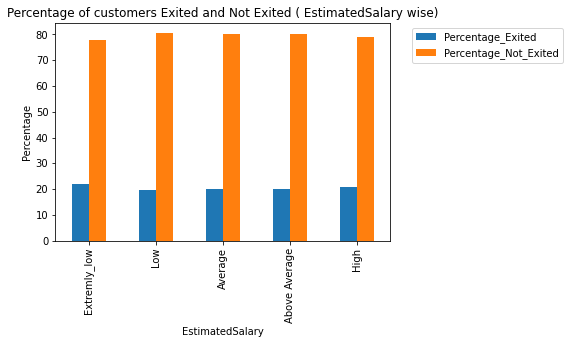

In [90]:
bank_data_EstimatedSalary.plot(x = "EstimatedSalary_1", y = ["Percentage_Exited", "Percentage_Not_Exited"], kind = "bar")
plt.xlabel('EstimatedSalary')
plt.ylabel('Percentage')
plt.title('Percentage of customers Exited and Not Exited ( EstimatedSalary wise)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### Customer having low credit score have slightly more chances to churn than customer having high credit score

### Adding new features based on the results of EDA

In [91]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,Balance_1,CreditScore_1,EstimatedSalary_1
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Elder,Low balance,Medium score,High
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Elder,Medium balance,Medium score,High
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Elder,High balance,Medium score,High
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Elder,Low balance,High score,Above Average
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Elder,High balance,High score,Above Average


In [92]:
bank_data.drop(['RowNumber','CustomerId','Surname','CreditScore','Age','Tenure','Balance','HasCrCard','EstimatedSalary'], axis = 1, inplace = True)

In [93]:
bank_data.head()

,Geography,Gender,NumOfProducts,IsActiveMember,Exited,Age_Group,Balance_1,CreditScore_1,EstimatedSalary_1
0,France,Female,1,1,1,Elder,Low balance,Medium score,High
1,Spain,Female,1,1,0,Elder,Medium balance,Medium score,High
2,France,Female,3,0,1,Elder,High balance,Medium score,High
3,France,Female,2,0,0,Elder,Low balance,High score,Above Average
4,Spain,Female,1,1,0,Elder,High balance,High score,Above Average


In [94]:
bank_data = pd.get_dummies(bank_data, columns=["Geography","Gender","NumOfProducts"])

In [95]:
bank_data.head()

,IsActiveMember,Exited,Age_Group,Balance_1,CreditScore_1,EstimatedSalary_1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,1,1,Elder,Low balance,Medium score,High,1,0,0,1,0,1,0,0,0
1,1,0,Elder,Medium balance,Medium score,High,0,0,1,1,0,1,0,0,0
2,0,1,Elder,High balance,Medium score,High,1,0,0,1,0,0,0,1,0
3,0,0,Elder,Low balance,High score,Above Average,1,0,0,1,0,0,1,0,0
4,1,0,Elder,High balance,High score,Above Average,0,0,1,1,0,1,0,0,0


In [96]:
replace_nums = {"Age_Group":     {"Teenager": 0, "Younger": 1, "Elder":2, "Older":3},
                "EstimatedSalary_1": {"Extremly_low": 0, "Low": 1, "Average": 2, "Above Average": 3,
                                  "High": 4},
                "CreditScore_1": {"Low score":0, "Medium score":1, "High score":2},
                "Balance_1":{"Low balance":0, "Medium balance":1, "High balance":2, "Highest balance":3}
               }

In [97]:
bank_data.replace(replace_nums, inplace=True)
bank_data.head()

,IsActiveMember,Exited,Age_Group,Balance_1,CreditScore_1,EstimatedSalary_1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,1,1,2,0,1,4,1,0,0,1,0,1,0,0,0
1,1,0,2,1,1,4,0,0,1,1,0,1,0,0,0
2,0,1,2,2,1,4,1,0,0,1,0,0,0,1,0
3,0,0,2,0,2,3,1,0,0,1,0,0,1,0,0
4,1,0,2,2,2,3,0,0,1,1,0,1,0,0,0


### Plotting co-relation plot

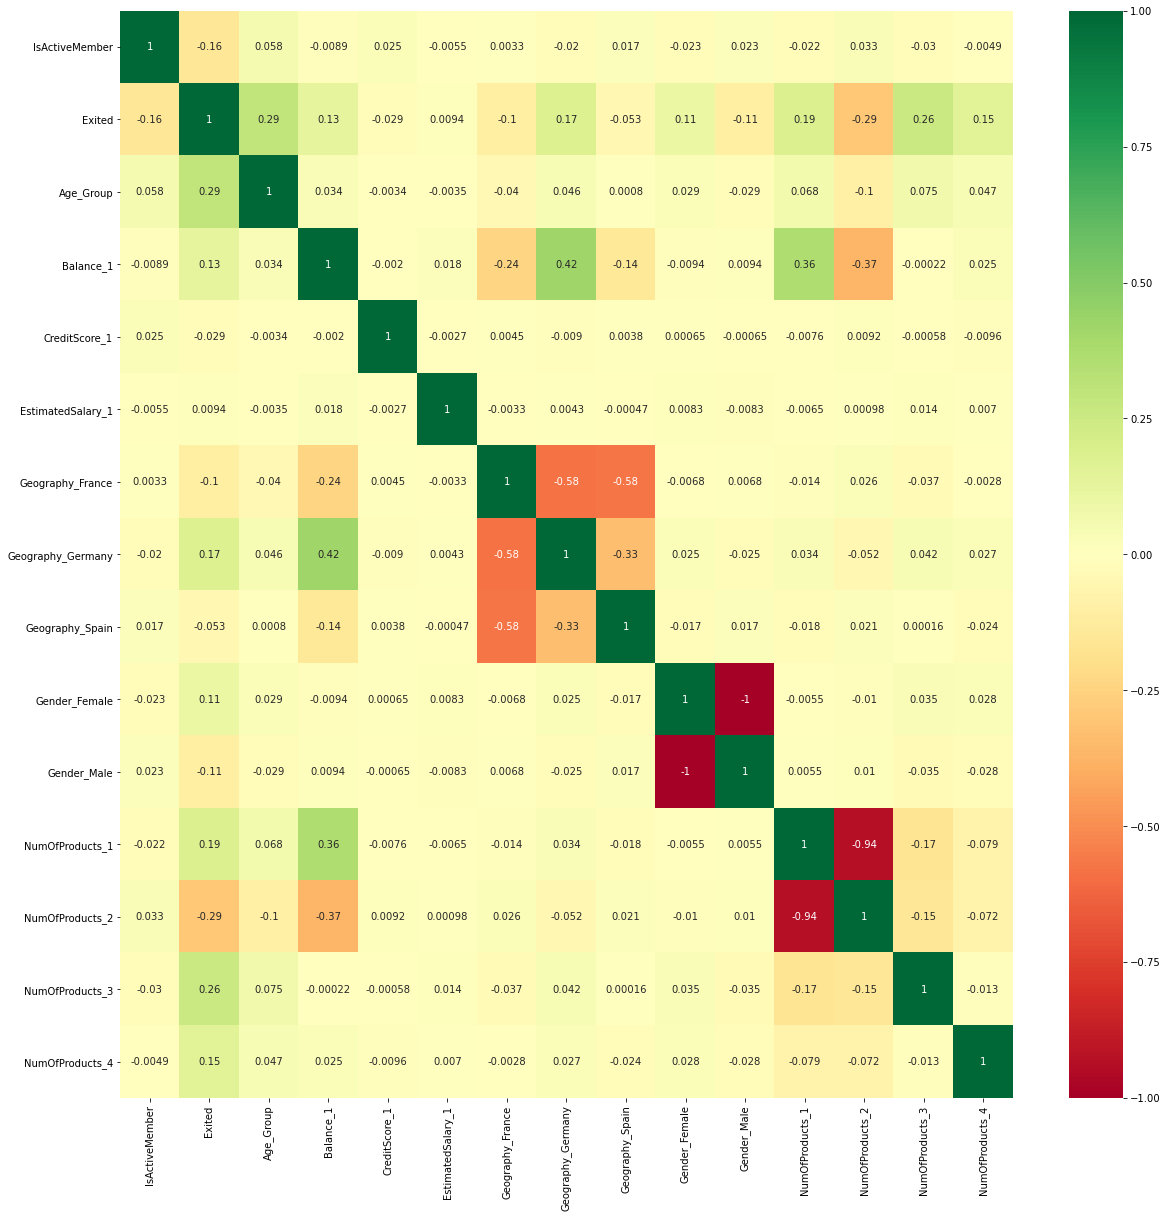

In [98]:
corrmat = bank_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(bank_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [99]:
bank_data.head()

,IsActiveMember,Exited,Age_Group,Balance_1,CreditScore_1,EstimatedSalary_1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,1,1,2,0,1,4,1,0,0,1,0,1,0,0,0
1,1,0,2,1,1,4,0,0,1,1,0,1,0,0,0
2,0,1,2,2,1,4,1,0,0,1,0,0,0,1,0
3,0,0,2,0,2,3,1,0,0,1,0,0,1,0,0
4,1,0,2,2,2,3,0,0,1,1,0,1,0,0,0


### Dividing the dataset into training and test set

In [100]:
Predictors = bank_data.drop(['Exited'], axis = 1)
Target = bank_data['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Predictors, Target, test_size = 0.20, random_state = 42, stratify = Target)

### Feature Importance

[0.08946311 0.2287099  0.10204448 0.07369614 0.11221118 0.01581161
 0.0464174  0.01238743 0.01163109 0.01228202 0.07090016 0.11784479
 0.07914116 0.02745954]


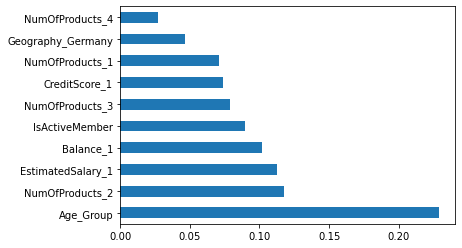

In [101]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

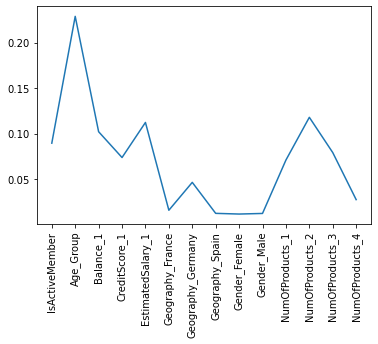

In [102]:
plt.plot(model.feature_importances_)
plt.xticks(np.arange(X_train.shape[1]), X_train.columns.tolist(), rotation=90);

In [103]:
X_train.head()

,IsActiveMember,Age_Group,Balance_1,CreditScore_1,EstimatedSalary_1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
2151,0,3,0,2,4,1,0,0,0,1,1,0,0,0
8392,0,1,2,2,3,0,1,0,0,1,1,0,0,0
5006,1,2,2,2,4,0,1,0,1,0,0,1,0,0
4117,0,2,0,1,3,1,0,0,0,1,0,1,0,0
7182,1,2,2,2,4,0,1,0,0,1,0,1,0,0


In [104]:
y_train.head()

2151    1
8392    1
5006    0
4117    0
7182    0
Name: Exited, dtype: int64

In [105]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 14)
(8000,)
(2000, 14)
(2000,)


### Building machine learning model for predicting churn

In [106]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [107]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [108]:
# Fit logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [100,150,200], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
lr = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
lr.fit(X_train,y_train)
best_model(lr)

0.8466250000000001
{'C': 1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=1, tol=1e-05)


In [110]:
# Fit best logistic regression
lr_best = LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='ovr',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
lr_best.fit(X_train,y_train)

LogisticRegression(C=0.5, multi_class='ovr', tol=1e-05)

### Accuracy

In [111]:
y_test.head(10)

5702    0
3667    0
1617    0
5673    0
4272    0
8270    0
7079    0
5295    0
845     0
5311    0
Name: Exited, dtype: int64

In [112]:
X_test.head(10)

,IsActiveMember,Age_Group,Balance_1,CreditScore_1,EstimatedSalary_1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
5702,0,2,0,1,3,1,0,0,0,1,0,1,0,0
3667,0,1,2,1,3,0,1,0,0,1,0,1,0,0
1617,1,2,0,1,4,0,0,1,1,0,0,1,0,0
5673,0,1,2,1,2,0,0,1,0,1,0,1,0,0
4272,1,1,1,1,4,0,0,1,1,0,1,0,0,0
8270,0,1,0,1,4,0,0,1,0,1,1,0,0,0
7079,1,1,2,1,3,0,1,0,0,1,0,1,0,0
5295,0,1,2,2,4,0,1,0,1,0,1,0,0,0
845,0,2,1,1,4,1,0,0,0,1,1,0,0,0
5311,0,2,0,2,3,1,0,0,1,0,0,1,0,0


In [113]:
y_pred = lr_best.predict(X_test) 
print(':',"%.3f" % accuracy_score(y_pred, y_test))

: 0.851


### Confusion matrix

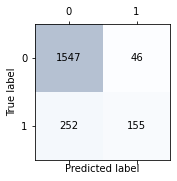

In [114]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Roc Auc Curve

### Prediction probablities

In [115]:
r_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_best.predict_proba(X_test)
lr_probs

array([[0.91196951, 0.08803049],
       [0.92711182, 0.07288818],
       [0.93773832, 0.06226168],
       ...,
       [0.34252685, 0.65747315],
       [0.92447505, 0.07552495],
       [0.89182303, 0.10817697]])

In [116]:
r_probs

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### Probablity for positive outcome

In [117]:
lr_probs_p = lr_probs[:, 1]
lr_probs_p

array([0.08803049, 0.07288818, 0.06226168, ..., 0.65747315, 0.07552495,
       0.10817697])

### Calculating AUROC

In [118]:
r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, lr_probs_p)

### Printing AUROC Score

In [119]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))

Random (chance) Prediction: AUROC = 0.500
Logistic Regression: AUROC = 0.838


### Calculating ROC Curve

In [120]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs_p)

### Plotting the curve

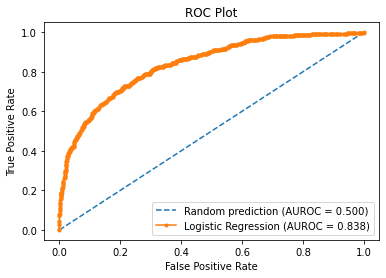

In [121]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [122]:
# Fit logistic regression with degree 2 polynomial
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
lr_2 = PolynomialFeatures(degree=2)
lr_2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
lr_2_Grid.fit(X_train,y_train)
best_model(lr_2_Grid)

0.846125
{'C': 10, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=10, max_iter=300, solver='liblinear')


In [123]:
# Fit best_logistic regression with pol 2 kernel
lr_2 = PolynomialFeatures(degree=2)
lr_2d = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='ovr', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
lr_2d.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=300, multi_class='ovr', solver='liblinear')

### Accuracy

In [124]:
y_pred_1 = lr_2d.predict(X_test) 
print(':',"%.3f" % accuracy_score(y_pred_1, y_test))

: 0.853


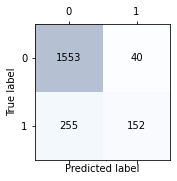

In [125]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_1)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### ROC AUC Curve

Random (chance) Prediction: AUROC = 0.500
Logistic Regression Degree 2: AUROC = 0.838


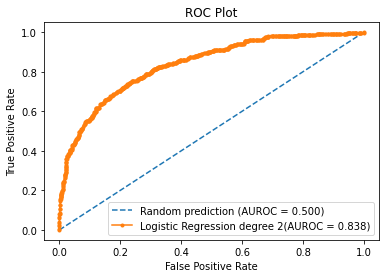

In [126]:
lr2_probs = lr_2d.predict_proba(X_test)
lr2_probs = lr2_probs[:, 1]
r_auc = roc_auc_score(y_test, r_probs)
lr2_auc = roc_auc_score(y_test, lr2_probs)
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Logistic Regression Degree 2: AUROC = %.3f' % (lr2_auc))
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_2_fpr, lr_2_tpr, _ = roc_curve(y_test, lr2_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr_2_fpr, lr_2_tpr, marker='.', label='Logistic Regression degree 2(AUROC = %0.3f)' % lr2_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [127]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(X_train, y_train)
best_model(RanFor_grid)

0.8498750000000002
{'max_depth': 7, 'max_features': 6, 'min_samples_split': 6, 'n_estimators': 100}
RandomForestClassifier(max_depth=7, max_features=6, min_samples_split=6)


In [128]:
# Fit best_Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50)

### Accuracy

In [129]:
y_pred_4 = RF.predict(X_test) 
print(':',"%.3f" % accuracy_score(y_pred_4, y_test))

: 0.855


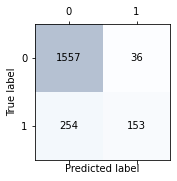

In [130]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_4)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.849


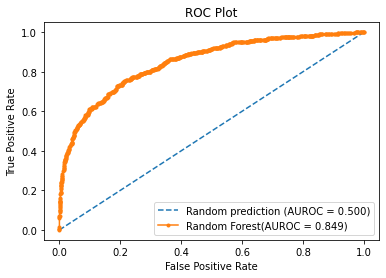

In [131]:
RF_probs = RF.predict_proba(X_test)
RF_probs = RF_probs[:, 1]
r_auc = roc_auc_score(y_test, r_probs)
RF_auc = roc_auc_score(y_test, RF_probs)
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (RF_auc))
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, RF_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest(AUROC = %0.3f)' % RF_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [132]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(X_train, y_train)
best_model(xgb_grid)

0.852375
{'gamma': 0.01, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 20}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [133]:
# Fit best_Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.2, max_delta_step=0,max_depth=5,
                    min_child_weight=10, missing=None, n_estimators=20,n_jobs=0, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(X_train, y_train)

[18:27:00] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=None, monotone_constraints='()',
              n_estimators=20, n_jobs=0, nthread=0, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, silent=True, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

### Accuracy

In [134]:
y_pred_5 = XGB.predict(X_test) 
print(':',"%.3f" % accuracy_score(y_pred_5, y_test))

: 0.858


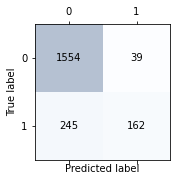

In [135]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_5)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Selecting best model

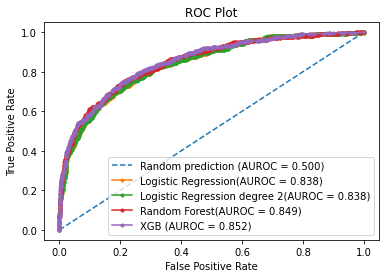

In [136]:
XGB_probs = XGB.predict_proba(X_test)
XGB_probs = XGB_probs[:, 1]
r_auc = roc_auc_score(y_test, r_probs)
XGB_auc = roc_auc_score(y_test, XGB_probs)
RF_auc = roc_auc_score(y_test, RF_probs)
lr2_auc = roc_auc_score(y_test, lr2_probs)
lr_auc = roc_auc_score(y_test, lr_probs_p)
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
XGB_fpr, XGB_tpr, _ = roc_curve(y_test, XGB_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression(AUROC = %0.3f)' % lr_auc)
plt.plot(lr_2_fpr, lr_2_tpr, marker='.', label='Logistic Regression degree 2(AUROC = %0.3f)' % lr2_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest(AUROC = %0.3f)' % RF_auc)
plt.plot(XGB_fpr, XGB_tpr, marker='.', label='XGB (AUROC = %0.3f)' % XGB_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()